In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
data


,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [3]:
data.isnull().sum()

id_client       0
id_group       74
sum_pay       127
id_point       81
months_reg      0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

id_client     0
id_group      0
sum_pay       0
id_point      0
months_reg    0
dtype: int64

In [6]:
data

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14
...,...,...,...,...,...
10971,1359021,control,799.0,1178.0,3
10972,1363347,control,4825.0,1178.0,6
10973,1373031,test,673.0,1179.0,1
10974,1370292,test,1120.0,1179.0,1


In [7]:
def statistical_analysis (r, q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995]):
    if type (r) != tuple and type (r) != list:
        print('Нужен список или кортеж!')
        return
    if len (r) <=4:
        print('Требуется более длинный ряд')
        return
    r = pd.Series(r)
    avg_r = r.mean()
    var_r = r.var()
    std_r = r.std()
    print('Среднее:', avg_r)
    print('Дисперсия:', var_r)
    print('Стандартное отклонение:', std_r)
    qs = np.quantile (r,q)
    for i in range(len(q)):
        if q[i] == 0.5:
            print ('Медиана:', qs[i])
        elif q[i] == 0.25:
            print('Первый квартиль', qs[i])
        elif q[i] == 0.75:
            print('Третий квартиль', qs[i])
        else:
            print('Дециль', qs[i])
        
        sns.histplot(r)
        
        return avg_r, var_r, std_r, qs

Среднее: 3568.7580258302582
Дисперсия: 8568932.941996625
Стандартное отклонение: 2927.27397795229
Дециль 410.0


(3568.7580258302582,
 8568932.941996625,
 2927.27397795229,
 array([  410.   ,  1250.75 ,  1590.   ,  2329.6  ,  3173.5  ,  3934.   ,
         5356.5  ,  7088.2  ,  7805.1  ,  8041.   ,  8453.64 ,  9043.66 ,
         9809.76 ,  9934.041, 10059.456, 20089.762, 20574.708, 21046.075]))

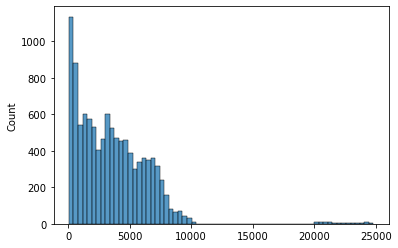

In [8]:
statistical_analysis (list(data['sum_pay']))

In [9]:
data = data[data['sum_pay']<15000]
data = data[data['sum_pay']>100]

In [10]:
data_control = data[data['id_group'] == 'control']
data_test = data[data['id_group'] == 'test']

In [11]:
def show_hist (data):
    data_control = data[data['id_group'] == 'control']
    data_test = data[data['id_group'] == 'test']
    sns.set(rc = {'figure.figsize':(16,10)})
    ax1 = sns.histplot(data_control['sum_pay'], color = 'blue')
    ax2 = sns.histplot(data_test['sum_pay'], color = 'orange')
    plt.show()

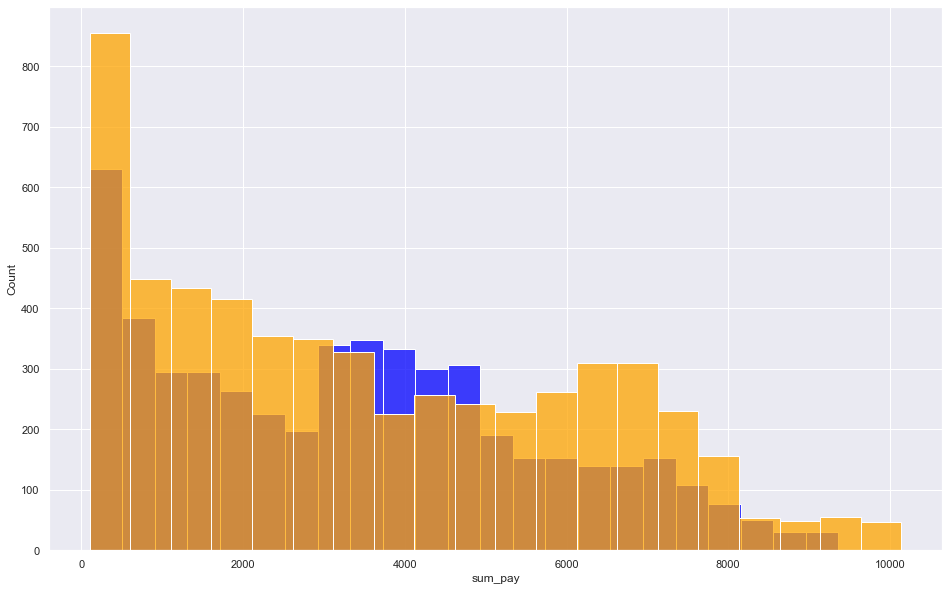

In [12]:
show_hist (data)

In [13]:
from scipy.stats import mannwhitneyu, ttest_ind
 

In [14]:
def mann_whitney_func (r1, r2, alpha = 0.05):
    s,p = mannwhitneyu (r1, r2)
    if p < alpha:
        print ('Распределения не равны')
    else:
        print ('Распределения равны')
    return s,p

In [15]:
test = data[data['id_group']=='test']['sum_pay'].dropna().values
control = data[data['id_group']=='control']['sum_pay'].dropna().values

In [16]:
mann_whitney_func (test, control)

Распределения не равны


(14750609.5, 0.03988250594249283)

In [17]:
def test_calc (r1, r2, alpha =0.05):
    s,p = ttest_ind(r1,r2)
    if p< alpha:
        print('Средние значения генеральных совокупностей не равны')
    else:
        print('Средние значения генеральных совокупностей равны')
    return s,p

In [18]:
test_calc (test, control)

Средние значения генеральных совокупностей не равны


(3.843604381831184, 0.00012193871556427206)

In [19]:
points = list()
points = set(data['id_point'])
points

{1178.0, 1179.0, 1182.0, 1186.0, 1188.0, 1199.0}

1186.0


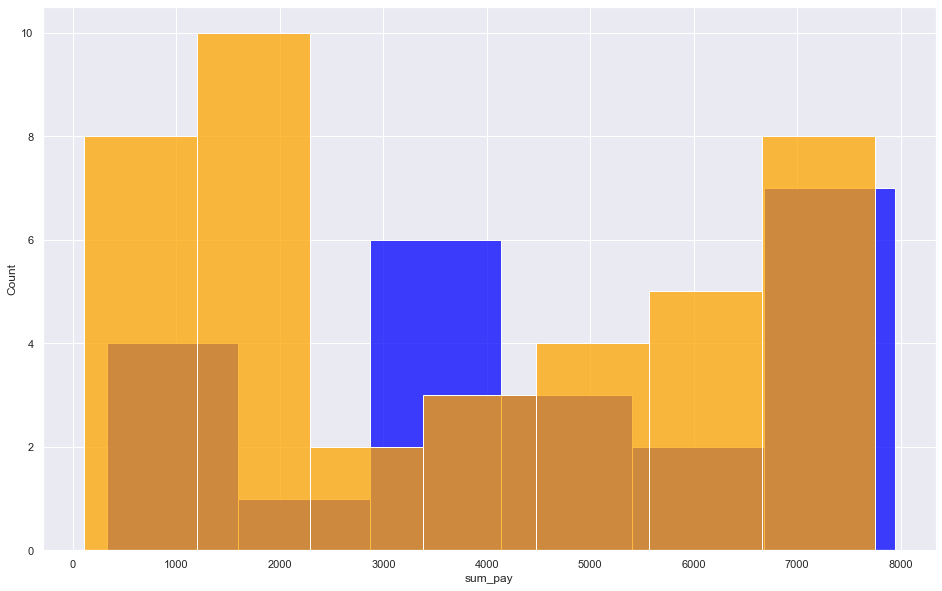

1188.0


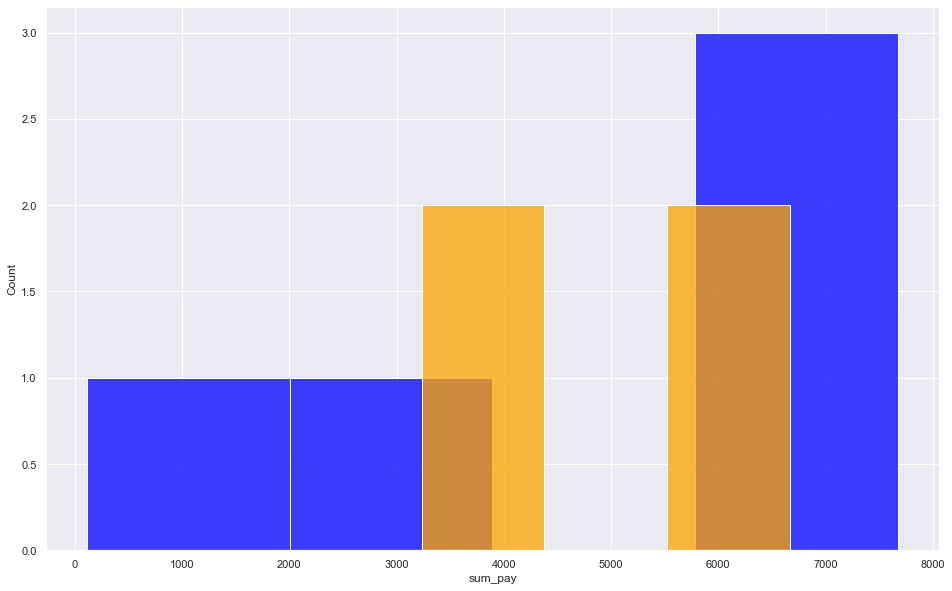

1199.0


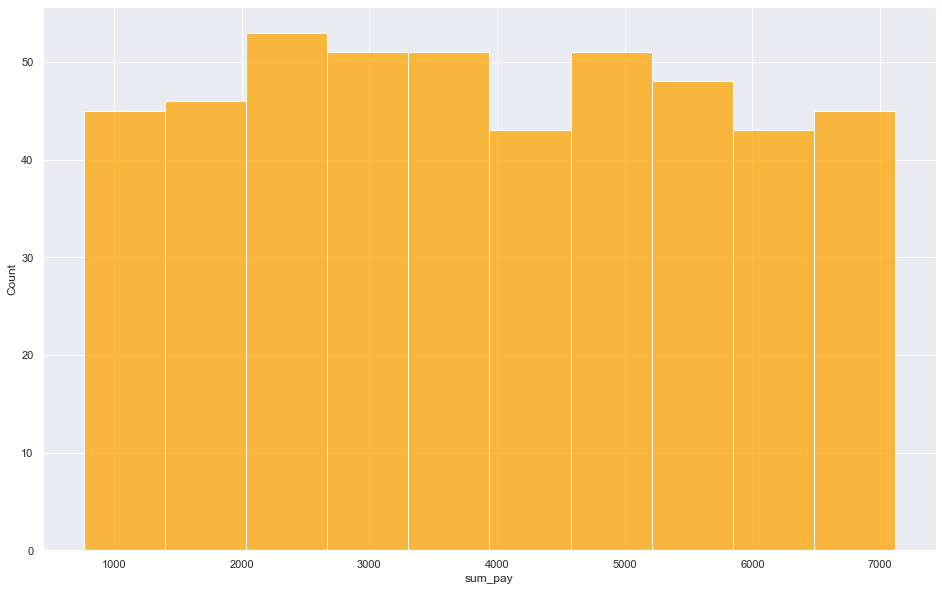

1178.0


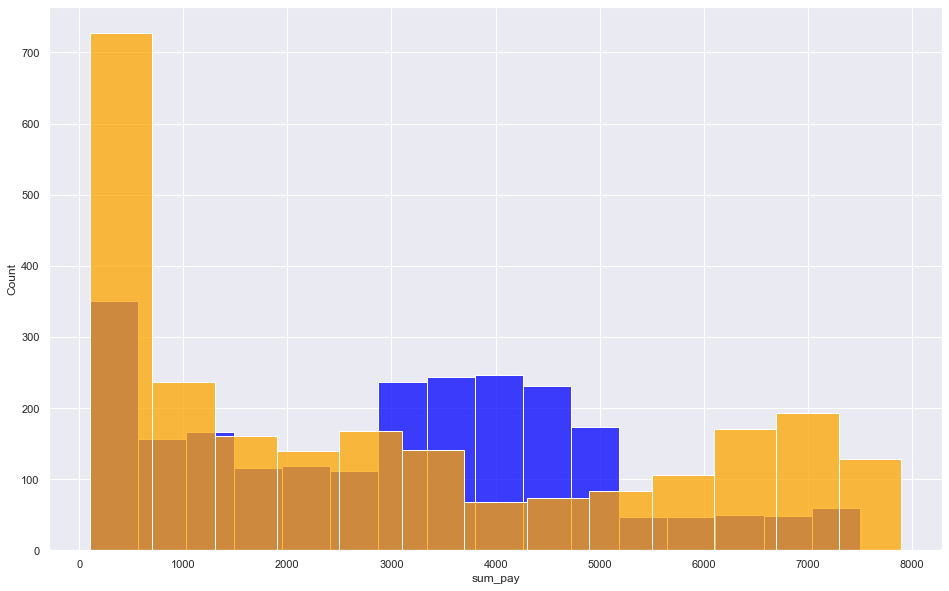

Распределения не равны
Средние значения генеральных совокупностей равны
1179.0


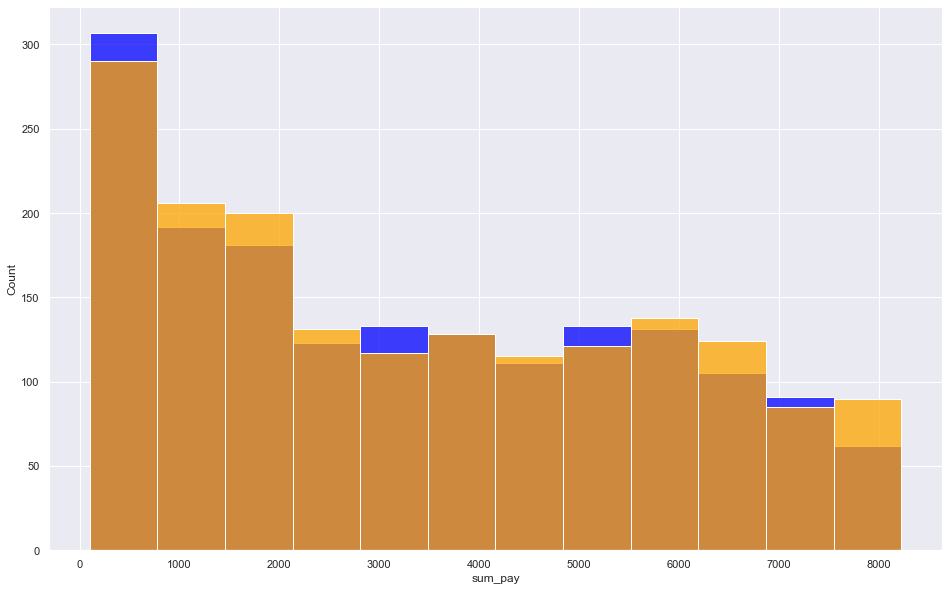

Распределения равны
Средние значения генеральных совокупностей равны
1182.0


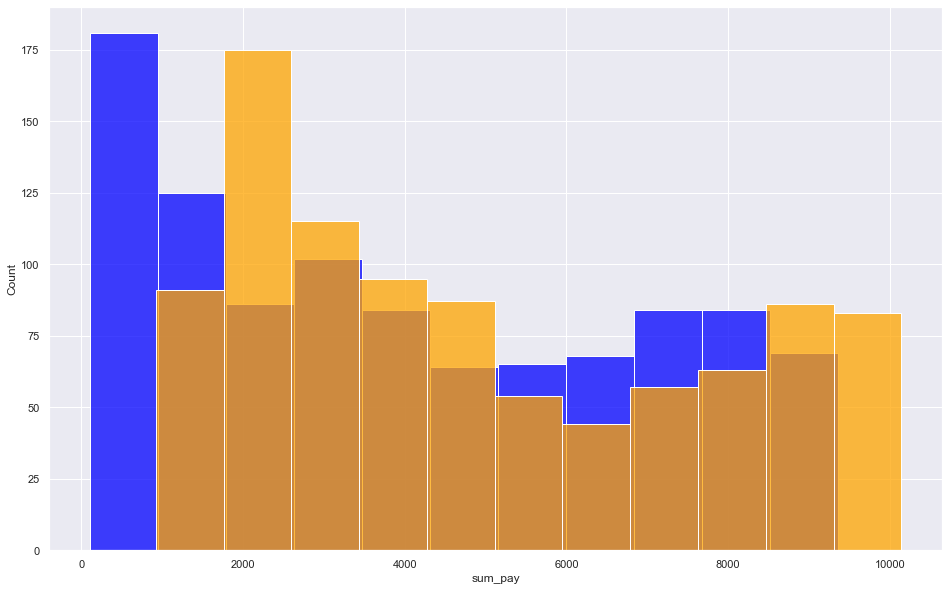

Распределения не равны
Средние значения генеральных совокупностей не равны


In [20]:
for id_point in points:
    data_control = data[(data['id_group'] == 'control') & (data['id_point'] == id_point)]
    data_test = data[(data['id_group'] == 'test') & (data['id_point'] == id_point)]
    print(id_point)
    show_hist(data[data['id_point']==id_point])
    if len (data_control) > 100 and len (data_control)>100:
        mann_whitney_func (data_test['sum_pay'], data_control['sum_pay'], 0.05 )
        test_calc (data_test['sum_pay'], data_control['sum_pay'], 0.05)


<AxesSubplot:xlabel='sum_pay', ylabel='Count'>

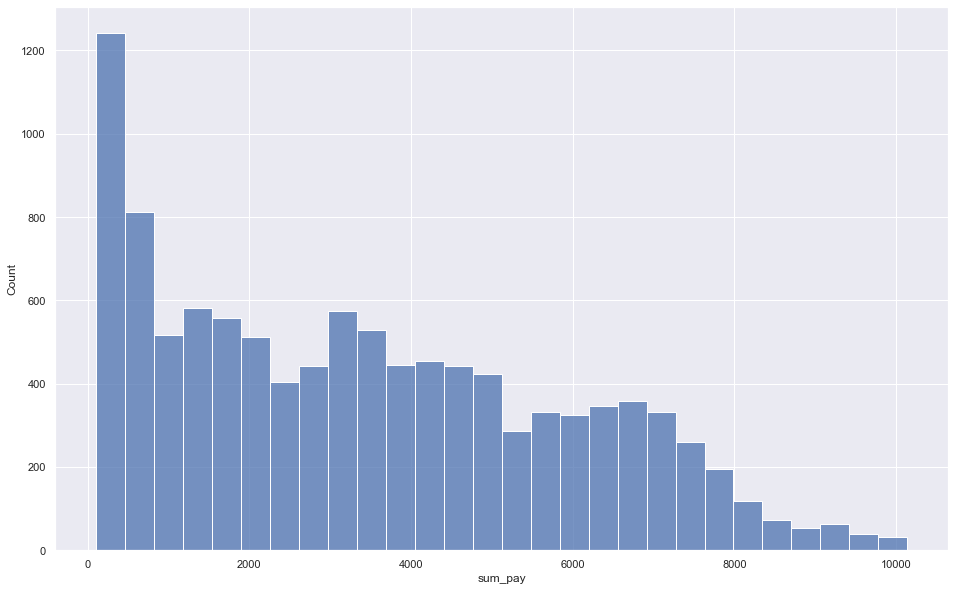

In [21]:
sns.histplot(data['sum_pay'])

<AxesSubplot:xlabel='months_reg', ylabel='Count'>

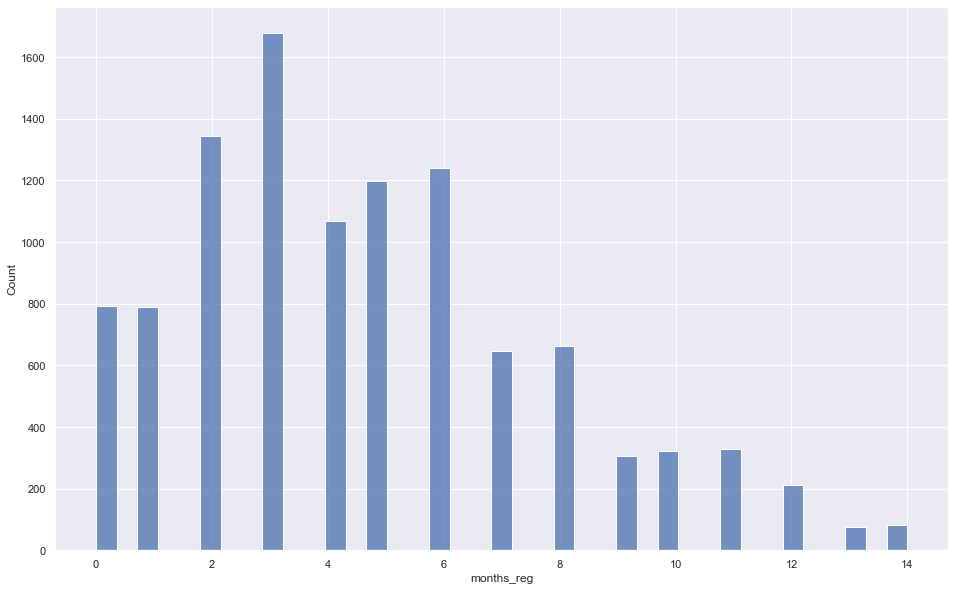

In [22]:
sns.histplot(data['months_reg'])

<AxesSubplot:xlabel='sum_pay', ylabel='months_reg'>

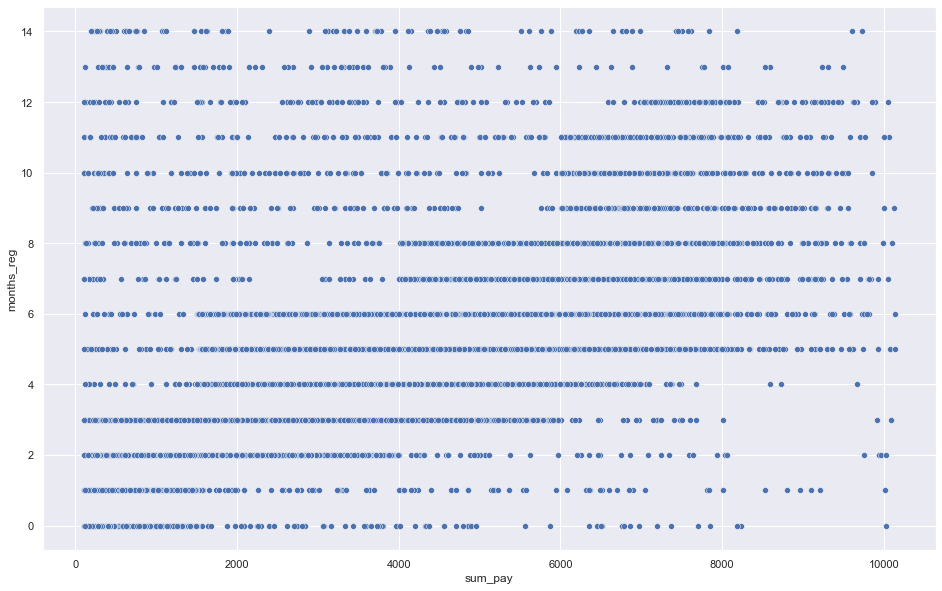

In [23]:
sns.scatterplot(data['sum_pay'], data['months_reg'] )

In [24]:
from scipy.stats import pearsonr, spearmanr

In [25]:
def proxi_ranges (r1, r2, alpha = 0.05):
    cov_matrix = np.cov(r1, r2)
    pearson_v, pearson_p = pearsonr(r1, r2)
    spearman_v, spearman_p = spearmanr(r1,r2)
    print ('Дисперсия ряда', r1.name, '=', cov_matrix[0,0])
    print ('Дисперсия ряда', r2.name, '=', cov_matrix[1,1])
    print ('Ковариация = ', cov_matrix[0,1])
    print ()
    if pearson_p < alpha:
        print('Корреляция Пирсона равна', pearson_v)
        if abs(pearson_v) < 0.3:
            print('Корреляция Пирсона слабая')
        elif abs(pearson_v) < 0.7:
            print('Корреляция Пирсона средняя')
        else:
            print ('Корреляция Пирсона сильная')
    else:
        print ('Корреляция Пирсона равна 0')
    print()
    if spearman_p < alpha:
        print('Корреляция Спирмена равна', spearman_v)
        if abs(spearman_v) < 0.3:
            print('Корреляция Спирмена слабая')
        elif abs(spearman_v) < 0.7:
            print('Корреляция Спирмена средняя')
        else:
            print ('Корреляция Спирмена сильная')
    else:
        print ('Корреляция Спирмена равна 0')

In [26]:
proxi_ranges (data['sum_pay'], data['months_reg'] )

Дисперсия ряда sum_pay = 6019043.352509183
Дисперсия ряда months_reg = 10.03480689519417
Ковариация =  4657.337888360844

Корреляция Пирсона равна 0.5992658113811631
Корреляция Пирсона средняя

Корреляция Спирмена равна 0.6530474733143181
Корреляция Спирмена средняя
